In [ ]:
# 1.3. 데이터 시각화 - 주요 차트 내용 중 박스 플롯 hue 구현 예제 코드

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Seaborn 내장 데이터셋 로드
tips = sns.load_dataset('tips')

# 데이터 준비
days = tips['day'].unique()
smokers = tips['smoker'].unique()

plt.figure(figsize=(8, 5))

# 각 day와 smoker 그룹별로 박스플롯 그리기
positions = []
data_to_plot = []
pos = 1

for day in sorted(days):  # day 순서대로
    for smoker in sorted(smokers):  # smoker = No, Yes
        group = tips[(tips['day'] == day) & (tips['smoker'] == smoker)]['total_bill']
        data_to_plot.append(group)
        positions.append(pos)
        pos += 1
    pos += 1  # day 사이 간격

# 박스플롯 그리기
bp = plt.boxplot(data_to_plot, positions=positions, widths=0.6, patch_artist=True)

# 색상 채우기 (smoker 구분)
colors = ['lightblue', 'lightcoral'] * len(days)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# x축 레이블: day 가운데 배치
xticks = []
xlabels = []
for i, day in enumerate(sorted(days)):
    xticks.append((i* (len(smokers)+1)) + 1.5)  # day 그룹의 중앙
    xlabels.append(day)

plt.xticks(xticks, xlabels)
plt.xlabel("day")
plt.ylabel("total_bill")
plt.title('Total Bill Distribution by Day and Smoker')

# 범례 추가
from matplotlib.patches import Patch
legend_handles = [Patch(color='lightblue', label='No'),
                  Patch(color='lightcoral', label='Yes')]
plt.legend(handles=legend_handles, title="smoker")

plt.show()

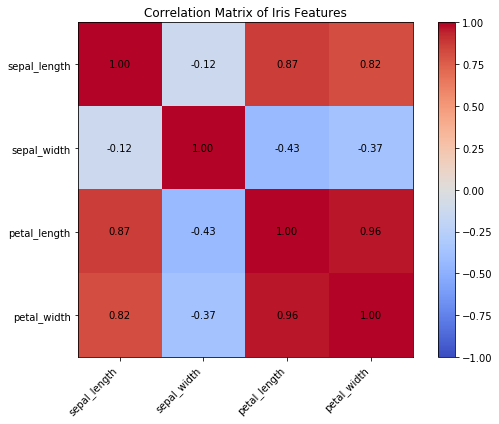

In [49]:
# 1.3. 데이터 시각화 - 주요 차트 내용 중 heatmap 예제 코드

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Seaborn 내장 데이터셋 로드
iris = sns.load_dataset('iris')

# 수치형 변수 간 상관계수 계산
corr = iris.corr()

# 히트맵 그리기
fig, ax = plt.subplots(figsize=(8, 6))

# imshow로 색상 맵 시각화
cax = ax.imshow(corr.values, cmap='coolwarm', vmin=-1, vmax=1)

# 컬럼 이름으로 x, y축 라벨 설정
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.columns)

# 각 셀에 상관계수 값 표시
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        ax.text(j, i, f"{corr.values[i, j]:.2f}", ha='center', va='center', color='black')

# 컬러바 추가
fig.colorbar(cax)

plt.title('Correlation Matrix of Iris Features')
plt.tight_layout()
plt.show()


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 준비 및 모델 학습
# 보스턴 주택 가격 데이터 사용
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target
X = sm.add_constant(X) # 상수항 추가

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Fri, 10 Oct 2025   Prob (F-statistic):               0.00
Time:                        17:32:43   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.0

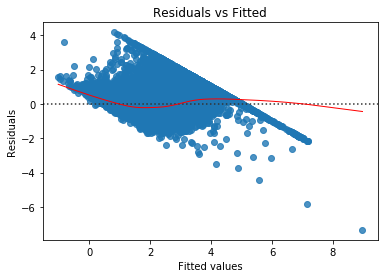

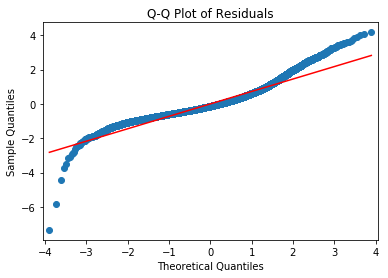

In [30]:
# 2. 잔차 및 예측값 계산
residuals = results.resid
fitted = results.fittedvalues

# 3. 회귀 가정 진단
# 3.1. 선형성 & 3.3. 등분산성: 잔차 대 예측값 산점도
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()
# 해석: 빨간색 lowess 곡선이 수평선(y=0)에서 크게 벗어나지 않고, 잔차들이 패턴 없이 흩어져 있으면 OK.

# 3.2. 정규성: Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()
# 해석: 점들이 빨간색 대각선 위에 놓여 있으면 정규성 만족.

# 3.4. 독립성: 더빈-왓슨 통계량
# results.summary() 결과표의 'Durbin-Watson' 값 확인 (약 0.83으로 양의 자기상관 의심)

In [31]:
# 4. 다중공선성 진단: VIF
# VIF 계산을 위한 함수 정의
def calculate_vif(X_df):
    vif = pd.DataFrame()
    vif["variables"] = X_df.columns
    vif["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    return vif

# 상수항(const)은 VIF 계산에서 제외
vif_results = calculate_vif(X.drop('const', axis=1))
print("\n--- VIF 결과 ---")
print(vif_results.sort_values('VIF', ascending=False))
# 해석: AveRooms, AveBedrms 등의 VIF가 높게 나타나는 것을 확인할 수 있음.
# 특히 위도(Latitude)와 경도(Longitude)는 함께 위치 정보를 나타내므로 VIF가 높게 나올 수 있음.


--- VIF 결과 ---
    variables         VIF
7   Longitude  633.711654
6    Latitude  559.874071
2    AveRooms   45.993601
3   AveBedrms   43.590314
0      MedInc   11.511140
1    HouseAge    7.195917
4  Population    2.935745
5    AveOccup    1.095243


In [35]:
pd.DataFrame(housing.data, columns=housing.feature_names)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

# 1. 데이터 준비 (예시: 유방암 데이터)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target # 0: 악성, 1: 양성

# 2. 데이터 분할 및 스케일링
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. 모델 학습
# LogisticRegression 하이퍼파라미터
# penalty: 규제 종류 ('l1', 'l2', 'elasticnet', 'none'). (기본값='l2')
# C: 규제 강도의 역수. 작을수록 강한 규제. (기본값=1.0)
# solver: 최적화에 사용할 알고리즘. 데이터셋 크기, 규제 종류에 따라 선택. ('liblinear', 'lbfgs', 'saga' 등) (기본값='lbfgs')
# class_weight: 클래스 불균형 처리를 위한 가중치 ('balanced' 또는 dict 형태). (기본값=None)
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train_scaled, y_train)

# 4. 예측 및 평가
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1] # 양성 클래스(1)에 대한 확률

print("--- Scikit-learn 이진 로지스틱 회귀 평가 ---")
print(f"정확도: {accuracy_score(y_test, y_pred):.3f}")
print(f"AUC: {roc_auc_score(y_test, y_pred_proba):.3f}")
print("혼동 행렬:\n", confusion_matrix(y_test, y_pred))
print("분류 리포트:\n", classification_report(y_test, y_pred))

# 회귀 계수(영향력) 확인
print("\n회귀 계수(coef):", log_reg.coef_)

--- Scikit-learn 이진 로지스틱 회귀 평가 ---
정확도: 0.988
AUC: 0.998
혼동 행렬:
 [[ 63   1]
 [  1 106]]
분류 리포트:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171


회귀 계수(coef): [[-0.48431991 -0.46467509 -0.4503601  -0.55685253 -0.15972054  0.65734006
  -0.54263986 -0.6288608  -0.11581996  0.02977112 -0.88835779  0.36116556
  -0.2111288  -0.95481577 -0.18663722  0.57519908  0.16879018 -0.25735014
   0.31928871  0.34294713 -0.93863448 -1.21290675 -0.73206367 -0.97569074
  -0.7585647   0.02832094 -0.79133303 -0.99061511 -0.86116755 -0.1606306 ]]


In [52]:
# 1. 데이터 준비 (예시: 붓꽃 데이터)
from sklearn.datasets import load_iris
iris = load_iris()
X_multi = iris.data
y_multi = iris.target # 0, 1, 2 세 개의 클래스

X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multi, y_multi, test_size=0.3, random_state=42, stratify=y_multi)

# 2. 모델 학습
# multi_class='multinomial'로 설정하여 다중 로지스틱 회귀(소프트맥스 회귀) 사용
# solver는 'lbfgs', 'newton-cg', 'saga' 등 지원
multi_log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', random_state=42)
multi_log_reg.fit(X_multi_train, y_multi_train)

# 3. 예측 및 평가
y_multi_pred = multi_log_reg.predict(X_multi_test)
print("\n--- Scikit-learn 다중 로지스틱 회귀 평가 ---")
print(f"정확도: {accuracy_score(y_multi_test, y_multi_pred):.3f}")
print("분류 리포트:\n", classification_report(y_multi_test, y_multi_pred))

# 각 클래스에 대한 회귀 계수 확인 (클래스 개수만큼의 계수 세트가 생성됨)
print("\n회귀 계수 (클래스 0, 1, 2 순서):\n", multi_log_reg.coef_)


--- Scikit-learn 다중 로지스틱 회귀 평가 ---
정확도: 0.889
분류 리포트:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.86      0.80      0.83        15
           2       0.81      0.87      0.84        15

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45


회귀 계수 (클래스 0, 1, 2 순서):
 [[-0.52971067  0.77840242 -2.13169357 -0.91156277]
 [-0.22525105 -2.19620339  0.68152478 -1.2045097 ]
 [-0.07738728 -0.19895638  2.49940092  2.12506361]]
